### From The US Social Security Administration (SSA) - frequency of baby names from 1880 to 2010.

Here is a worked through example from the book 'Python for Data Analysis' by Wes McKinney

In [117]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_rows = 10

### I gathered the content using the following method. WesM's method follows this.

In [153]:
url = 'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/babynames/yob1880.txt'
url_noend = url[:-8]
url_noend

'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/babynames/yob'

In [154]:
url_end = url[-4:]
url_end

'.txt'

In [155]:
# every year has a separate file, we need to change the url for each year 1980-2010 to pull each file
# there is no year column in the data, so we need to add that in too

yr = int(url[-8:-4])
yr

1880

In [156]:
col_names = ['name', 'sex', 'births', 'year']

In [157]:
# pulling the data for 1980, to check the url is working

names = pd.read_csv(url, header = None, names = col_names)
names['year'] = yr        # adding in the year column
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [159]:
# creating a loop to pull the other years 1981-2010 inclusive

while yr < 2011:
    yr += 1
    url_cx = url_noend + str(yr) + url_end
    nameloop = pd.read_csv(url_cx, header = None, names = col_names)
    nameloop['year'] = yr
    names = names.concat(nameloop, ignore_index=True)

In [160]:
names

# the data in this example has 1690784 rows which we can confirm below

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
33833,Zymaire,M,5,2010
33834,Zyonne,M,5,2010
33835,Zyquarius,M,5,2010
33836,Zyran,M,5,2010


### WesM's method for getting the data

In [163]:
names1880 = pd.read_csv(url, names = ['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [164]:
# we sum the births column to get the total number of births each year

names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [ ]:
# Now grabbing all of the other files from 1981-2010
# This appends each year to the list 'pieces'
# We then assemble the data into a single DataFrame

years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/babynames/yob%d.txt' %year
    frame = pd.read_csv(path, names = columns)
    frame['year'] = year
    pieces.append(frame)

In [232]:
pieces[:2]

[           name sex  births  year
 0          Mary   F    7065  1880
 1          Anna   F    2604  1880
 2          Emma   F    2003  1880
 3     Elizabeth   F    1939  1880
 4        Minnie   F    1746  1880
 ...         ...  ..     ...   ...
 1995     Woodie   M       5  1880
 1996     Worthy   M       5  1880
 1997     Wright   M       5  1880
 1998       York   M       5  1880
 1999  Zachariah   M       5  1880
 
 [2000 rows x 4 columns],            name sex  births  year
 0          Mary   F    6919  1881
 1          Anna   F    2698  1881
 2          Emma   F    2034  1881
 3     Elizabeth   F    1852  1881
 4      Margaret   F    1658  1881
 ...         ...  ..     ...   ...
 1930     Wiliam   M       5  1881
 1931     Wilton   M       5  1881
 1932       Wing   M       5  1881
 1933       Wood   M       5  1881
 1934     Wright   M       5  1881
 
 [1935 rows x 4 columns]]

In [169]:
names = pd.concat(pieces, ignore_index = True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


### Now we have the data, we can aggregate it at the year and sex level using groupby or pivot_table

In [170]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


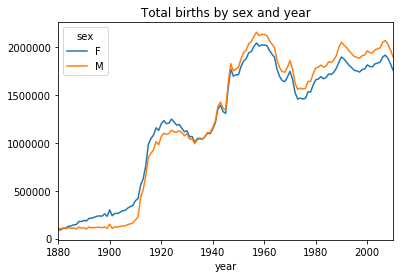

In [171]:
total_births.plot(title='Total births by sex and year')

### We'll insert a column with the fraction of each name relative to the total number of births

In [172]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


### Sanity check that the prop columns sum to 1 for each year

In [173]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, dtype: float64

### Getting the top 1,000 names for each sex/year combination

In [174]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])

top1000 = grouped.apply(get_top1000)

top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2010 M   1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

In [175]:
# drop the group index, not needed

top1000.reset_index(inplace=True, drop=True)

top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


### The DIY approach to get the top 1,000 sex/year combinations:

In [176]:
pieces=[]

'''for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
    
top1000 = pd.concat(pieces, ignore_index=True)
top1000'''

"for year, group in names.groupby(['year', 'sex']):\n    pieces.append(group.sort_values(by='births', ascending=False)[:1000])\n    \ntop1000 = pd.concat(pieces, ignore_index=True)\ntop1000"

### Splitting the Top 1,000 into Boy and Girl portions

In [177]:
boys = top1000[top1000.sex=='M']
boys

,name,sex,births,year,prop
942,John,M,9655,1880,0.087381
943,William,M,9533,1880,0.086277
944,James,M,5927,1880,0.053641
945,Charles,M,5348,1880,0.048401
946,George,M,5126,1880,0.046392
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [178]:
girls = top1000[top1000.sex=='F']
girls

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
260872,Violeta,F,250,2010,0.000142
260873,Leilah,F,250,2010,0.000142
260874,Alaysia,F,250,2010,0.000142
260875,Dania,F,249,2010,0.000142


### Pivot table for the total number of births by year and name

In [179]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x148cc6978>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x14a01a630>], dtype=object)

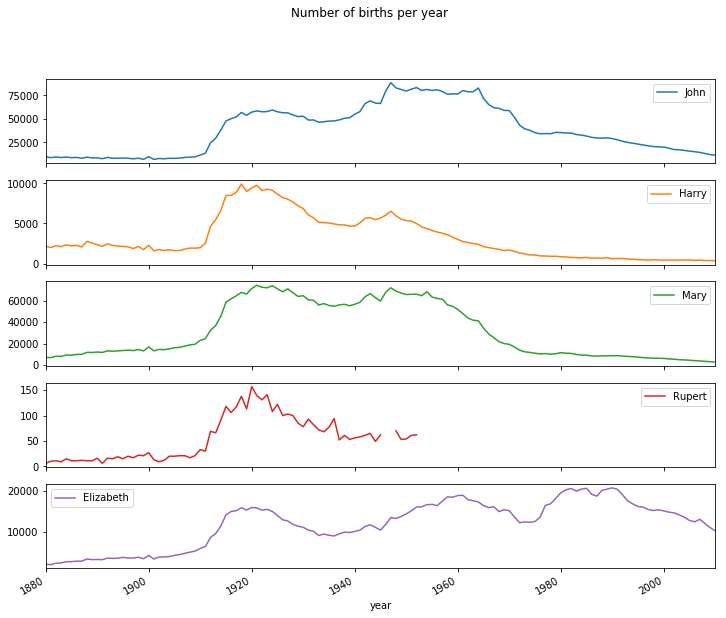

In [180]:
subset = total_births[['John', 'Harry', 'Mary', 'Rupert', 'Elizabeth']]

subset.plot(subplots=True, figsize=(12, 10), grid=False, title = "Number of births per year")

# it looks as thought these have grown their popularity has grown and then dropped... ...read on

In [239]:
# One explanation is that fewer parents are choosing common names for their children

# A measure of this would be the proportion of total births that are in the top 1000 most popular names

table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)
table

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
...,...,...
2006,0.753153,0.860368
2007,0.745959,0.855159
2008,0.740933,0.850003


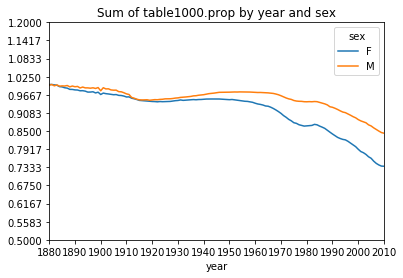

In [240]:
table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0.5, 1.2, 13), xticks=range(1880, 2020, 10))

# yticks=np.linspace(startvalue, endvalue, numberofmarkers)

# xticks=range(startvalue, endvalue, incremental increase)

# There appears to be an increase in name diversity

### Finding the number of distinct names taken in order of popularity from highest to lowest in the top 50% of births

In [241]:
# Just the boys to begin with

df = boys[boys.year == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [242]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
            ...   
261872    0.842748
261873    0.842850
261874    0.842953
261875    0.843055
261876    0.843156
Name: prop, dtype: float64

In [243]:
prop_cumsum.values.searchsorted(0.5)

# since arrays are zero-indexed, the result is 117

116

In [244]:
# by contrast, in 1900 the figure was much smaller

df = boys[boys.year ==1900]

in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()

in1900.values.searchsorted(0.5)

24

### We can now apply this operation to each year/sex combination. Groupby those fields, then apply a function returning the count for each group

In [245]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity

year  sex
1880  F       38
      M       14
1881  F       38
      M       14
1882  F       38
            ... 
2008  M      109
2009  F      241
      M      114
2010  F      246
      M      117
dtype: int64

In [246]:
diversity = diversity.unstack('sex')
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


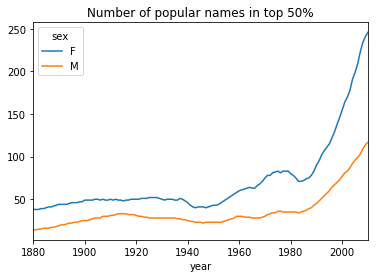

In [247]:
diversity.plot(title='Number of popular names in top 50%')

# girl names have always been more diverse than boy names and this diversity has increased over time

# what could be driving the diversity? an increase of alternative spellings
# FURTHERWORK - name length

### The last letter revolution

In [248]:
# extract last letter from name column

get_last_letter = lambda x:x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

last_letters.head()

0    y
1    a
2    a
3    h
4    e
Name: last_letter, dtype: object

In [249]:
table1 = names.pivot_table('births', index = last_letters, columns=['sex', 'year'], aggfunc=sum)
table1

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
...              ...      ...      ...      ...      ...      ...      ...   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                       ...            M            \
year            1887     1888     1889    ...         2001      2002   
last_letter                               ...                          
a            48942.0  59442.0  58631.0    ...      39124.0   38815.0   
b                NaN      NaN      NaN    ...      50950.0   49284.0   
c                NaN      NaN      NaN    ...      27113.0   27238.0   
d             1027.0   1298.0   1374.0    ...      60838.0   55829.0   
e            54353.0  66750.0  66663.0    ...     145395.0  144651.0   
...              ...      ...      ...    ...          ...       ...   
v                NaN      NaN      NaN    ...       1209.0    1332.0   
w                NaN      NaN      NaN    ...      52265.0   50103.0   
x                NaN      NaN      NaN    ...      10691.0   11009.0   
y            14980.0  17931.0  17601.0    ...     139109.0  134557.0   
z              188.0    238.0    277.0    ...       2840.0    2737.0   

sex                                                                      \
year             2003      2004      2005      2006      2007      2008   
last_letter                                                               
a             37825.0   38650.0   36838.0   36156.0   34654.0   32901.0   
b             48065.0   45914.0   43144.0   42600.0   42123.0   39945.0   
c             27697.0   26778.0   26078.0   26635.0   26864.0   25318.0   
d             53391.0   51754.0   50670.0   51410.0   50595.0   47910.0   
e            144769.0  142098.0  141123.0  142999.0  143698.0  140966.0   
...               ...       ...       ...       ...       ...       ...   
v              1652.0    1823.0    1794.0    2010.0    2295.0    2418.0   
w             49079.0   47556.0   45464.0   43217.0   40251.0   36937.0   
x             11718.0   12399.0   13025.0   13992.0   14306.0   14834.0   
y            130569.0  128367.0  125190.0  123707.0  123397.0  122633.0   
z              2722.0    2710.0    2903.0    3086.0    3301.0    3473.0   

sex                              
year             2009      2010  
last_letter                      
a             31430.0   28438.0  
b             38862.0   38859.0  
c             24048.0   23125.0  
d             46172.0   44398.0  
e            135496.0  129012.0  
...               ...       ...  
v              2589.0    2723.0  
w             33181.0   30656.0  
x             16640.0   16352.0  
y            112922.0  110425.0  
z              3633.0    3476.0  

[26 rows x 262 columns]

In [250]:
# get 3 years and print the first few rows

subtable = table1.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [251]:
# Next normalise the table by total births to compute a new table containing...

# ...the proportin of total births for each sex ending in each letter

subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [252]:
letter_prop = subtable / subtable.sum()


letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
...               ...       ...       ...       ...       ...       ...
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

[26 rows x 6 columns]

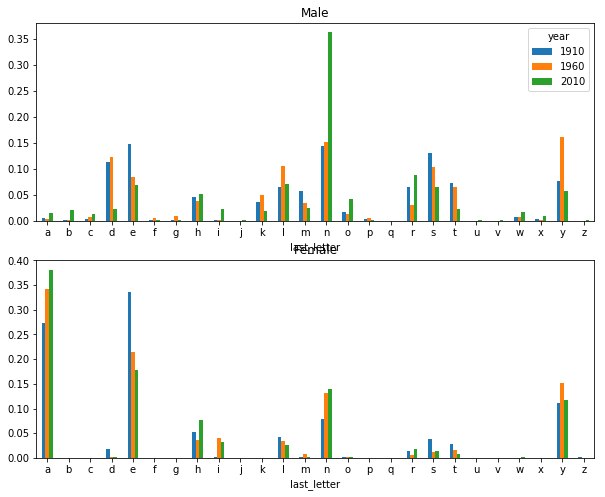

In [253]:
fig, axes = plt.subplots(2,1, figsize = (10,8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title = 'Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title = 'Female', legend=False)

# Boy names ending with n have increased significantly

# Girls names ending with 3 have decreased and ending with a has increased

### Using the full table again we normalise by year/sex and select some letters. We transpose to make each column a time series.

In [270]:
letter_prop = table1 / table1.sum()
letter_prop

sex                 F                                                    \
year             1880      1881      1882      1883      1884      1885   
last_letter                                                               
a            0.345587  0.343440  0.338764  0.341251  0.338550  0.341270   
b                 NaN       NaN       NaN       NaN       NaN       NaN   
c                 NaN       NaN  0.000046  0.000045       NaN       NaN   
d            0.006693  0.006601  0.006806  0.007211  0.007100  0.006478   
e            0.366819  0.370616  0.374582  0.373159  0.372722  0.372896   
...               ...       ...       ...       ...       ...       ...   
v                 NaN       NaN       NaN       NaN       NaN       NaN   
w                 NaN  0.000054       NaN       NaN       NaN       NaN   
x                 NaN       NaN       NaN  0.000062       NaN       NaN   
y            0.115053  0.113142  0.112609  0.107397  0.107866  0.104670   
z            0.001165  0.001033  0.000983  0.001255  0.001147  0.001127   

sex                                                    ...            M  \
year             1886      1887      1888      1889    ...         2001   
last_letter                                            ...                
a            0.339703  0.335258  0.332764  0.328706    ...     0.020162   
b                 NaN       NaN       NaN       NaN    ...     0.026256   
c                 NaN       NaN       NaN       NaN    ...     0.013972   
d            0.006967  0.007035  0.007266  0.007703    ...     0.031352   
e            0.372802  0.372324  0.373675  0.373736    ...     0.074927   
...               ...       ...       ...       ...    ...          ...   
v                 NaN       NaN       NaN       NaN    ...     0.000623   
w            0.000035       NaN       NaN       NaN    ...     0.026934   
x                 NaN       NaN       NaN       NaN    ...     0.005509   
y            0.103336  0.102615  0.100380  0.098677    ...     0.071687   
z            0.001398  0.001288  0.001332  0.001553    ...     0.001464   

sex                                                                      \
year             2002      2003      2004      2005      2006      2007   
last_letter                                                               
a            0.020019  0.019177  0.019505  0.018481  0.017635  0.016747   
b            0.025418  0.024368  0.023171  0.021645  0.020778  0.020357   
c            0.014048  0.014042  0.013514  0.013083  0.012991  0.012983   
d            0.028794  0.027069  0.026118  0.025420  0.025075  0.024451   
e            0.074603  0.073396  0.071710  0.070799  0.069748  0.069445   
...               ...       ...       ...       ...       ...       ...   
v            0.000687  0.000838  0.000920  0.000900  0.000980  0.001109   
w            0.025840  0.024882  0.023999  0.022809  0.021079  0.019452   
x            0.005678  0.005941  0.006257  0.006534  0.006825  0.006914   
y            0.069397  0.066197  0.064781  0.062806  0.060338  0.059634   
z            0.001412  0.001380  0.001368  0.001456  0.001505  0.001595   

sex                                        
year             2008      2009      2010  
last_letter                                
a            0.016189  0.015927  0.014980  
b            0.019655  0.019693  0.020470  
c            0.012458  0.012186  0.012181  
d            0.023574  0.023398  0.023387  
e            0.069362  0.068663  0.067959  
...               ...       ...       ...  
v            0.001190  0.001312  0.001434  
w            0.018175  0.016814  0.016148  
x            0.007299  0.008432  0.008614  
y            0.060342  0.057223  0.058168  
z            0.001709  0.001841  0.001831  

[26 rows x 262 columns]

In [271]:
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

# Using this DataFrame we can plot the timeseries

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


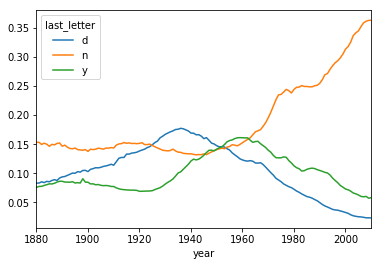

In [256]:
dny_ts.plot()

### Names that changed sexes eg.Leslie

In [272]:
all_names = pd.Series(top1000.name.unique())
all_names

0            Mary
1            Anna
2            Emma
3       Elizabeth
4          Minnie
          ...    
6863        Masen
6864        Rowen
6865       Yousef
6866       Joziah
6867       Maxton
dtype: object

In [273]:
# Creating a list of names that contain 'lesl'

lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [274]:
# Now we filter those names
# Then we sum them

filtered = top1000[top1000.name.isin(lesley_like)]
filtered

,name,sex,births,year,prop
632,Leslie,F,8,1880,0.000088
1108,Leslie,M,79,1880,0.000715
2462,Leslie,F,11,1881,0.000120
3014,Leslie,M,92,1881,0.000913
4512,Leslie,F,9,1882,0.000083
...,...,...,...,...,...
256327,Lesly,F,699,2008,0.000371
258036,Leslie,F,1975,2009,0.001081
258378,Lesly,F,598,2009,0.000327
260073,Leslie,F,1558,2010,0.000886


In [275]:
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [276]:
# Aggregate by sex/year and normalise within the year

table2 = filtered.pivot_table('births', index = 'year', columns='sex', aggfunc='sum')
table2

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0
...,...,...
2006,4166.0,NaN
2007,3805.0,NaN
2008,3022.0,NaN


In [279]:
table3 = table2.div(table2.sum(1), axis=0)
table3

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
...,...,...
2006,1.000000,NaN
2007,1.000000,NaN
2008,1.000000,NaN


### Visualising - plot the breakdown of sex over time for the Lesley like names

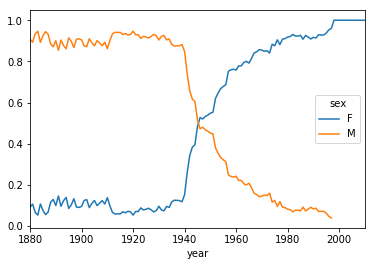

In [280]:
table3.plot()

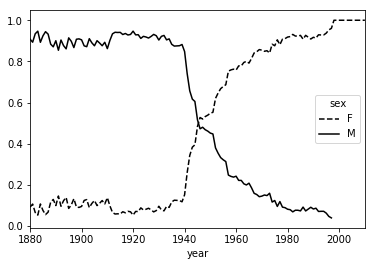

In [281]:
# Changing the line style to a dashed line for 'F' series

table3.plot(style={'M':'k-', 'F':'k--'})